In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("Seguimiento de gripe de fhca.xlsx", header=1, index_col=1, usecols=3)

In [3]:
df[:10]

,Hora,temperatura,"Escurrimiento nasal 1=bajo, 3=alto"
2017-03-07 11:23:29,NaN,36.3,3
2017-03-07 12:00:46,NaN,36.2,3
2017-03-07 13:30:15,NaN,36.3,3
2017-03-07 15:47:45,NaN,37.0,3
2017-03-07 16:47:11,NaN,36.7,3
2017-03-07 18:54:26,NaN,36.6,3
2017-03-07 19:26:41,NaN,36.6,3
2017-03-07 21:32:48,NaN,37.1,3
2017-03-07 22:09:02,NaN,36.6,3
2017-03-07 23:47:08,NaN,36.3,3


In [4]:
temp = df['temperatura']

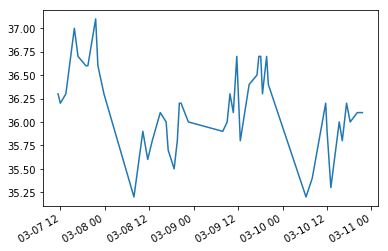

In [5]:
temp.plot()

In [6]:
en = df['Escurrimiento nasal 1=bajo, 3=alto']
en['2017-03-09 18:35:19']=en['2017-03-09 20:10:21']=1
en

/usr/local/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


2017-03-07 11:23:29    3
2017-03-07 12:00:46    3
2017-03-07 13:30:15    3
2017-03-07 15:47:45    3
2017-03-07 16:47:11    3
2017-03-07 18:54:26    3
2017-03-07 19:26:41    3
2017-03-07 21:32:48    3
2017-03-07 22:09:02    3
2017-03-07 23:47:08    3
2017-03-08 07:53:07    2
2017-03-08 10:17:17    3
2017-03-08 11:36:16    3
2017-03-08 12:49:46    3
2017-03-08 14:59:44    3
2017-03-08 16:34:52    2
2017-03-08 17:07:30    2
2017-03-08 18:43:59    3
2017-03-08 19:35:44    2
2017-03-08 20:08:36    2
2017-03-08 20:36:11    2
2017-03-08 22:35:06    1
2017-03-09 07:51:57    1
2017-03-09 09:03:05    2
2017-03-09 09:48:51    1
2017-03-09 10:42:55    2
2017-03-09 11:39:16    1
2017-03-09 12:04:10    1
2017-03-09 12:35:49    1
2017-03-09 14:59:15    2
2017-03-09 17:06:00    2
2017-03-09 17:36:33    1
2017-03-09 18:07:21    1
2017-03-09 18:35:19    1
2017-03-09 19:42:36    1
2017-03-09 20:10:21    1
2017-03-10 06:20:52    3
2017-03-10 08:01:34    1
2017-03-10 11:39:27    1
2017-03-10 12:01:45    1


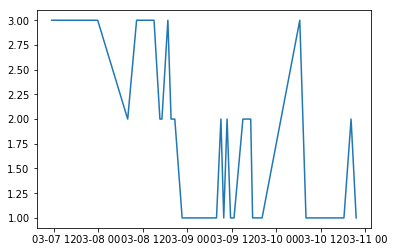

In [7]:
plt.plot(en)

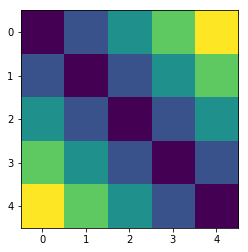

In [8]:
a=np.array([1,2,3,4,5])
xa = np.repeat(a, repeats=5)
ya = a[np.newaxis].repeat(5, axis=0).flatten()
plt.imshow(np.abs(xa-ya).reshape(5,5))

In [9]:
def matriz_de_recurrencia1(serie):
    """'serie' es una pandas.core.series.Series, indexada con 
    pandas.tseries.index.DatetimeIndex y valores numéricos."""
    tiempo=np.array(serie.index)
    n = tiempo.size
    xs = np.repeat(tiempo, repeats=n)
    ys = tiempo[np.newaxis].repeat(n, axis=0).flatten()
    mat = np.abs(serie[xs].values - serie[ys].values).reshape(n,n)
    plt.imshow(np.sqrt(mat), cmap=plt.cm.hot)
    
def matriz_de_recurrencia(serie):
    """'serie' es una pandas.core.series.Series, indexada con 
    pandas.tseries.index.DatetimeIndex y valores numéricos."""
    tiempo=np.array(serie.index)
    n = tiempo.size
    xs = np.repeat(tiempo, repeats=n)
    ys = tiempo[np.newaxis].repeat(n, axis=0).flatten()
    mat = ((serie[xs].values - serie[ys].values)**2).reshape(n,n)
    plt.imshow(np.sqrt(mat), cmap=plt.cm.hot)
    
def matriz_de_recurrencia_ciclo(serie):
    """'serie' es una pandas.core.series.Series, indexada con 
    pandas.tseries.index.DatetimeIndex y valores numéricos.
    quiero que 9 este cerca de 0, así 
    """
    tiempo=np.array(serie.index)
    n = tiempo.size
    xs = np.repeat(tiempo, repeats=n)
    ys = tiempo[np.newaxis].repeat(n, axis=0).flatten()
    mat1 = np.abs(serie[xs].values - serie[ys].values)
    mat = np.minimum(mat1, 20 - mat1).reshape(n,n)
    plt.imshow(np.sqrt(mat), cmap=plt.cm.hot)

In [10]:
def charts(ts):
    plt.plot(ts[-100:], 'g*-') # grafica sólo últimos 100 valores
    plt.show()
    matriz_de_recurrencia1(ts)
    plt.show()

In [11]:
len(temp)

47

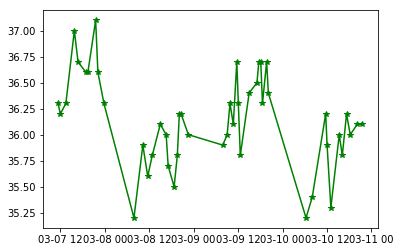

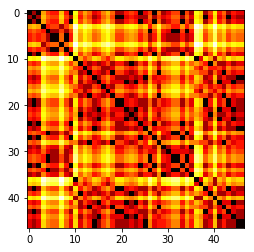

In [12]:
charts(temp)

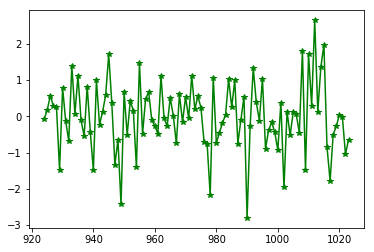

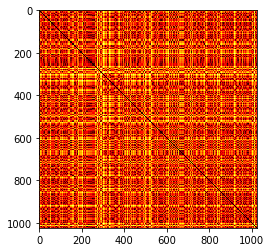

In [13]:
charts(pd.Series(np.random.randn(1024)))

In [14]:
def logistica(R,x):
    return R*x-R*x*x

def orbita(f, R):
    x0 = 0.5
    n = 1000
    for _ in range(n): #transciente
        x0 = f(R, x0)
    l = [x0]
    for _ in range(n - 1):
        l.append(f(R, l[-1]))
    return pd.Series(l)

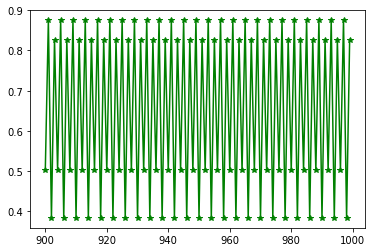

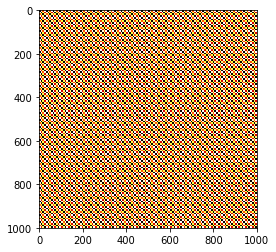

In [15]:
charts(orbita(logistica, 3.5))

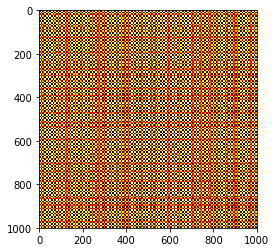

In [16]:
matriz_de_recurrencia(orbita(logistica, 3.6))

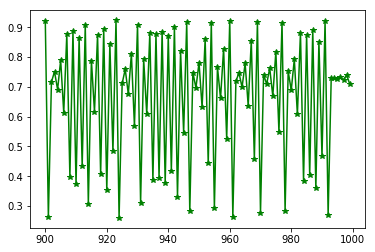

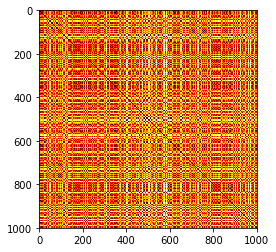

In [17]:
charts(orbita(logistica, 3.7))

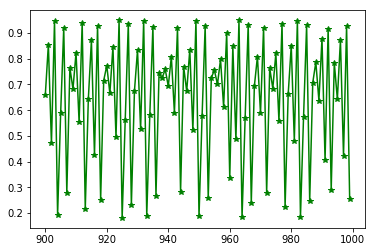

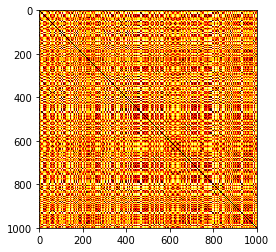

In [18]:
charts(orbita(logistica, 3.8))

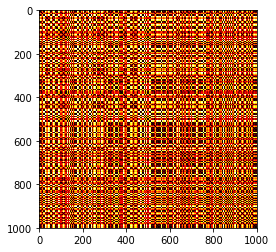

In [19]:
matriz_de_recurrencia(orbita(logistica, 3.9))

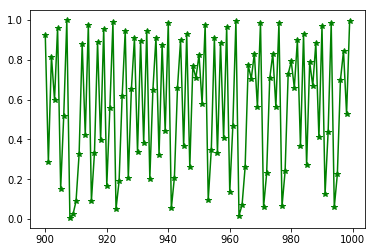

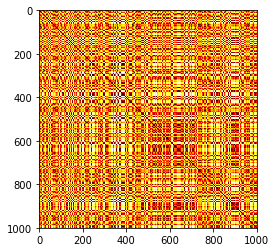

In [20]:
charts(orbita(logistica, 3.9999))

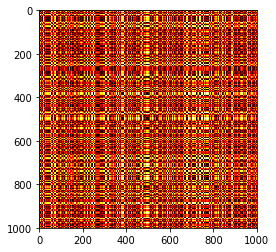

In [21]:
def seno(R, x):
    return np.sin(R*np.pi*x)

matriz_de_recurrencia(orbita(seno, 2))

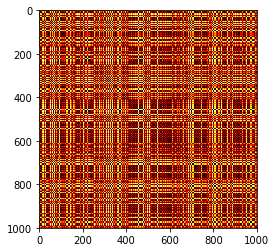

In [22]:
matriz_de_recurrencia(orbita(seno, .9))

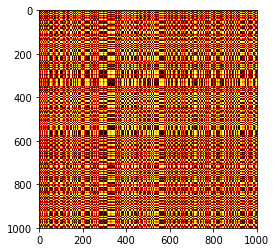

In [23]:
matriz_de_recurrencia(orbita(seno, 1))

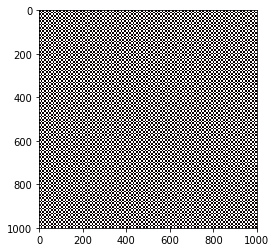

In [24]:
matriz_de_recurrencia(orbita(seno, 1.5))

In [25]:
def digitos(n, k):
    "devuelve los primeros n dígitos de k."
    l = [0]
    for _ in range(n):
        l.append(k)
        l[-2], k = int(10*l[-1]), 10*l[-1] - int(10*l[-1])
    return pd.Series(l[:-1])

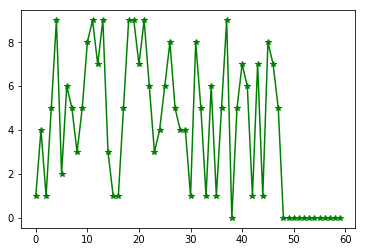

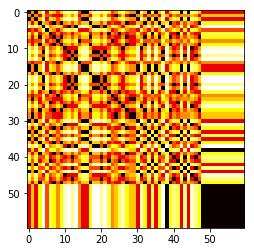

In [26]:
charts(digitos(60, np.pi-3))

In [27]:
try:
    # import version included with old SymPy
    from sympy.mpmath import mp
except ImportError:
    # import newer version
    from mpmath import mp
mp.dps = 1000  # set number of digits
#print(mp.pi) # print pi to a thousand places

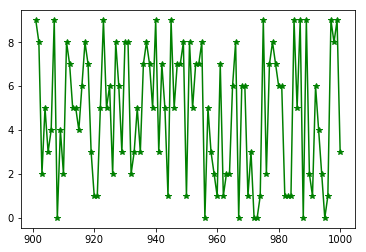

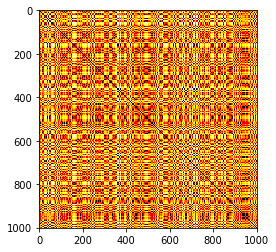

In [28]:
charts(digitos(1001, mp.pi-3))

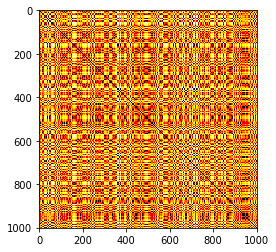

In [29]:
matriz_de_recurrencia_ciclo(digitos(1001, mp.pi-3))

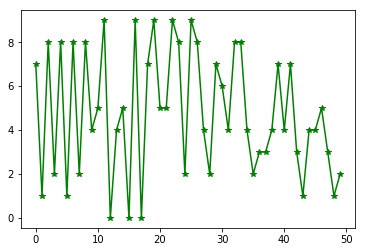

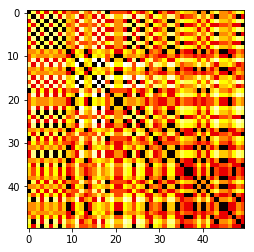

In [30]:
charts(digitos(50, np.e-2))

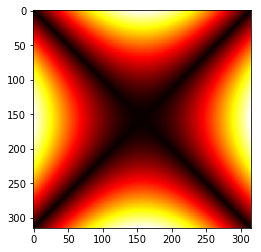

In [31]:
matriz_de_recurrencia(pd.Series(np.sin(np.arange(0,np.pi,.01))))

In [32]:
def fibonacci(n):
    l = [1, 1]
    for _ in range(n-2):
        l.append(l[-2] + l[-1])
    return pd.Series(l)

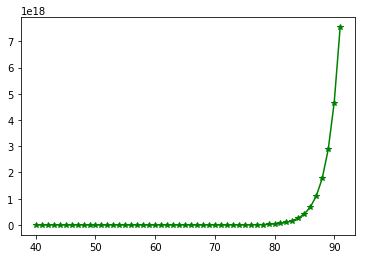

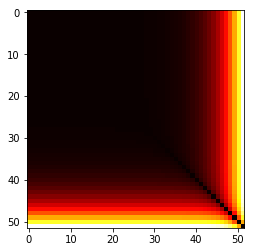

In [33]:
charts(fibonacci(92)[40:]) # ultimo valor 92

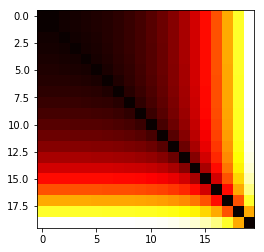

In [34]:
matriz_de_recurrencia1(fibonacci(20)) # ultimo valor 92

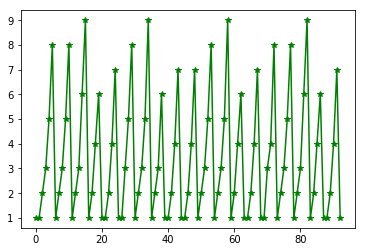

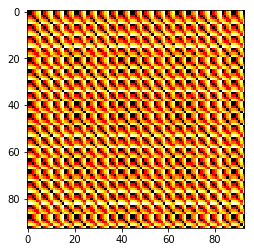

In [35]:
def primer_digito_fibonacci(n):
    a = 1
    b = 1
    l = [1, 1]
    for _ in range(n-2):
        a, b = b, a+b
        l.append(int(b / 10 ** int(np.log(b)/np.log(10))))
    return pd.Series(l)

charts(primer_digito_fibonacci(93)) #ultimo valor 93, probar con 11, 20

(array([28., 17., 11.,  9.,  7.,  6.,  5.,  6.,  4.]),
 array([1.        , 1.88888889, 2.77777778, 3.66666667, 4.55555556,
        5.44444444, 6.33333333, 7.22222222, 8.11111111, 9.        ]),
 <a list of 9 Patch objects>)

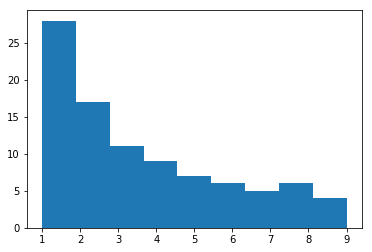

In [36]:
plt.hist(primer_digito_fibonacci(93), bins=9)

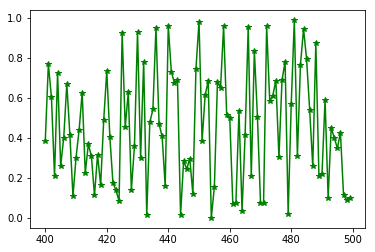

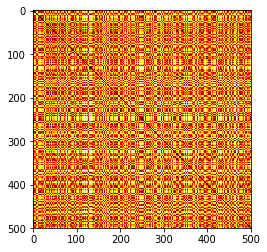

In [37]:
charts(pd.Series(np.random.rand(500)))